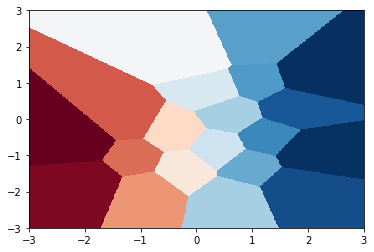

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from numpy import *



##############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)



kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10,tol=1e-4)
kmeans.fit(X)

    
xmin = -3
xmax = 3
ymin = -3
ymax = 3
xx, yy = np.meshgrid(linspace(xmin,3,400), linspace(-3,3,400))
Zi = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Zi = Zi.reshape(xx.shape)
Z = zeros(shape=shape(Zi))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    mask = Zi==i
    Z[mask] = mean(1.0*X[index,0])

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.RdBu,
           aspect='auto', origin='lower')


centroids = kmeans.cluster_centers_


    
plt.show()

In [142]:
import pandas
from sklearn import preprocessing

df = pandas.read_csv('../data/Gaia-SDSS.csv')

y = (df.E).values/1.0e5
x = (df.Jphi).values
feh = (df.feh).values

X = array([x,y]).T
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

kmeans = KMeans(init='k-means++', n_clusters=1000, n_init=10,tol=1e-4)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1000, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

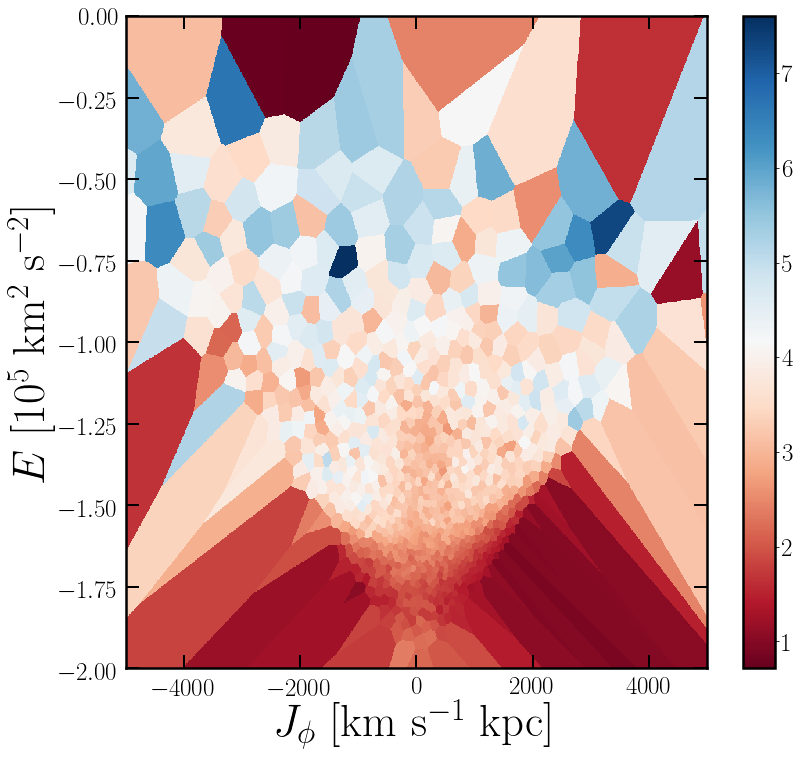

In [150]:
from PlotFuncs import *
rlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}(J_z/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
fig,ax1 = MySquarePlot(plab,Elab)

nfine = 1000
xmin = -5000.0
xmax = 5000.0
ymin = -2.0
ymax = 0.0
xx, yy = np.meshgrid(linspace(xmin,xmax,nfine), linspace(ymin,ymax,nfine))
Zi = kmeans.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Zi = Zi.reshape(xx.shape)
Z = zeros(shape=shape(Zi))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    mask = Zi==i
    fehi = feh[index]
    vr = df.GalzVel[index]
    ntot = 1.0*size(vr)
    Z[mask] = mean(abs(df.GalRecZ[index]))

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.RdBu,
           aspect='auto', origin='lower')

plt.colorbar()   
plt.show()

In [151]:
i

999

In [149]:
size(kmeans.labels_)

65406

In [101]:
scaler.transform(np.c_[xx.ravel(), yy.ravel()])

array([[-6.76066387e+04, -2.08057831e+01],
       [-6.71544718e+04, -2.08057831e+01],
       [-6.67023049e+04, -2.08057831e+01],
       ...,
       [ 6.66869323e+04, -2.32617798e+00],
       [ 6.71390993e+04, -2.32617798e+00],
       [ 6.75912662e+04, -2.32617798e+00]])

In [100]:
shape(X)

(65406, 2)